In [1]:
import pandas as pd

In [2]:
order = ["AS22WG001","AS22WG002","AS22WG003","AS22WG004","AS22WG005","AS22WG006","AS22WG007","AS22WG008","AS22WG009","AS22WG010","AS22WG011","AS22WG012","AS22WG013","AS22WG014","AS22WG015","AS22WG016","AS22WG017","AS22WG018","AS22WG019","AS22WG020","AS22WG021","AS22WG022","AS22WG023","AS22WG024"]

# Variant number confirmation

We used 2 methods in order to get the number of variants each vcf file have: <br>
1. Hail - a python package which works with SPARK and vcf file. the problem was it was too slow
2. bcftools - CL program. very common among bioinformaticains
<br><br>


Allegedly, the amount of variants suppose to be similar in both methods. Our result suggests otherwise

gap between bcf and hail
(positive means there are more variants in bcftools)


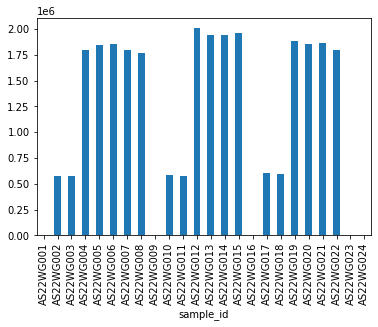

In [21]:
bcfs = pd.read_csv('../data/variant_number.csv').set_index('sample_id')
hail = pd.read_csv('../data/hail_number.tsv', sep='\t').set_index('sample_id')
vdf = pd.concat([bcfs.all_variants.rename('bcftools_var'),hail.all_variants.rename('hail_var')],axis=1).dropna()
vdf = vdf.iloc[[vdf.index.tolist().index(i) for i in order]]

vdf['difference'] = (vdf.bcftools_var -  vdf.hail_var).abs()
x = (vdf.bcftools_var -  vdf.hail_var).plot.bar()
print( "variant difference between bcf and hail\n(positive means there are more variants in bcftools)")

The plot and the table below shows unfiltred  samples  (e.g 005-007) and parents of dsd samples shows big difference.
<br>
It is possible to conclude  there was a filter which was not applied on non-filter samples  and on parents of samples. <br>
Checking the genotype (GT) in samples with large difference, showed refrence GT were not excluded, as they should have. <br>
A modification in the code was preformed in order to fix it, and any future mistakes of this kind. <br>
After applying these changes, the result are similar

,bcftools_var,hail_var,difference
AS22WG001,2691561,2691562.0,1.0
AS22WG002,2115915,2115916.0,1.0
AS22WG003,2115050,2115050.0,0.0
AS22WG004,5053273,5053273.0,0.0
AS22WG005,4987121,4987121.0,0.0
AS22WG006,4974219,4974219.0,0.0
AS22WG007,5053549,5053549.0,0.0
AS22WG008,5061690,5061690.0,0.0
AS22WG009,2699664,2699664.0,0.0
AS22WG010,2116770,2116770.0,0.0


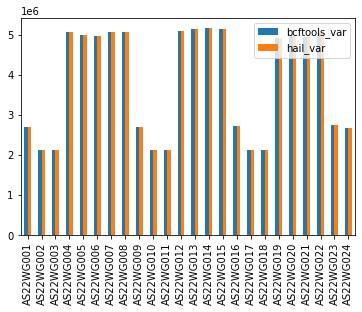

In [4]:
bcfs = pd.read_csv('../data/variant_number_fixed.csv').set_index('Unnamed: 0')

vdf = pd.concat([bcfs.all_variants.rename('bcftools_var'),hail.all_variants.rename('hail_var')],axis=1).dropna()
vdf = vdf.iloc[[vdf.index.tolist().index(i) for i in order]]
vdf.plot.bar()
vdf['difference'] = (vdf.bcftools_var -  vdf.hail_var).abs()
vdf

Doing other filterations, such as reading depth (DP) filteration or gnomAD's Allele frequency outputed the same results:<br>

In [14]:
bcfs = pd.read_csv('../data/variant_number_fixed.csv').set_index('Unnamed: 0')
hail = pd.read_csv('../data/hail_number.tsv', sep='\t').set_index('sample_id')
bcfs.columns = [i + '_bcf' for i in bcfs.columns]
hail.columns = [i + '_hail' for i in hail.columns]
comb = pd.concat([bcfs, hail], axis=1)
comb = comb[comb.columns.sort_values()].dropna().drop(columns=['interval_variants_AF<0.01_DP>10_bcf','interval_variants_DP>10_bcf'])
comb = comb.iloc[[comb.index.tolist().index(i) for i in order]]
display(comb)

,all_variants_bcf,all_variants_hail,interval_variants_AF<0.01_bcf,interval_variants_AF<0.01_hail,interval_variants_bcf,interval_variants_hail
AS22WG001,2691561,2691562.0,175,175.0,36959,36959.0
AS22WG002,2115915,2115916.0,152,152.0,34582,36959.0
AS22WG003,2115050,2115050.0,156,156.0,34645,36957.0
AS22WG004,5053273,5053273.0,152,152.0,34043,37510.0
AS22WG005,4987121,4987121.0,151,151.0,33925,37511.0
AS22WG006,4974219,4974219.0,160,160.0,33941,37510.0
AS22WG007,5053549,5053549.0,157,157.0,34027,37511.0
AS22WG008,5061690,5061690.0,144,144.0,34342,37510.0
AS22WG009,2699664,2699664.0,364,364.0,39517,39517.0
AS22WG010,2116770,2116770.0,260,260.0,36498,39516.0


The table shows the same amount of variant in each sample for both methods in "all_variant" column & filteration by AF. <br>
There are some diffrences in the numbers of interval_variants but not in the AF filteration-


Diffrence in variant number plot
 (color indicates the filtering, negative means more variants in hail method)


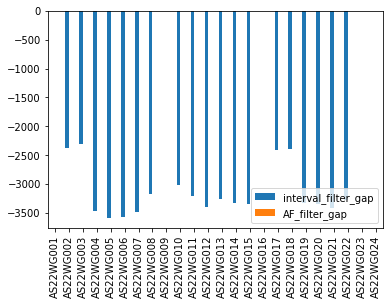

In [23]:
diffrence_inter = (comb.interval_variants_bcf - comb.interval_variants_hail).rename("interval_filter_gap")
diffrence_AF = (comb['interval_variants_AF<0.01_bcf'] - comb['interval_variants_AF<0.01_hail'] ).rename('AF_filter_gap')
diffrence = pd.concat([diffrence_inter,diffrence_AF], axis=1)
diffrence = diffrence.iloc[[comb.index.tolist().index(i) for i in order]]

x = diffrence.plot.bar()
print("Diffrence in variant number plot\n (color indicates the filtering, negative means more variants in hail method)")

This can be explained by other filter wich are being done over the bcftools out put (such as removing unknown GT ./.). <br>
Since the numbers of the AF filteration are similar, I wish we can mark this problem as solved :)